In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('customer_booking.csv',encoding='latin-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


In [ ]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


In [ ]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df['flight_day'] = df['flight_day'].map(mapping)
df['flight_day'].value_counts()

Series([], Name: flight_day, dtype: int64)

Text(0, 0.5, 'Number of bookings')

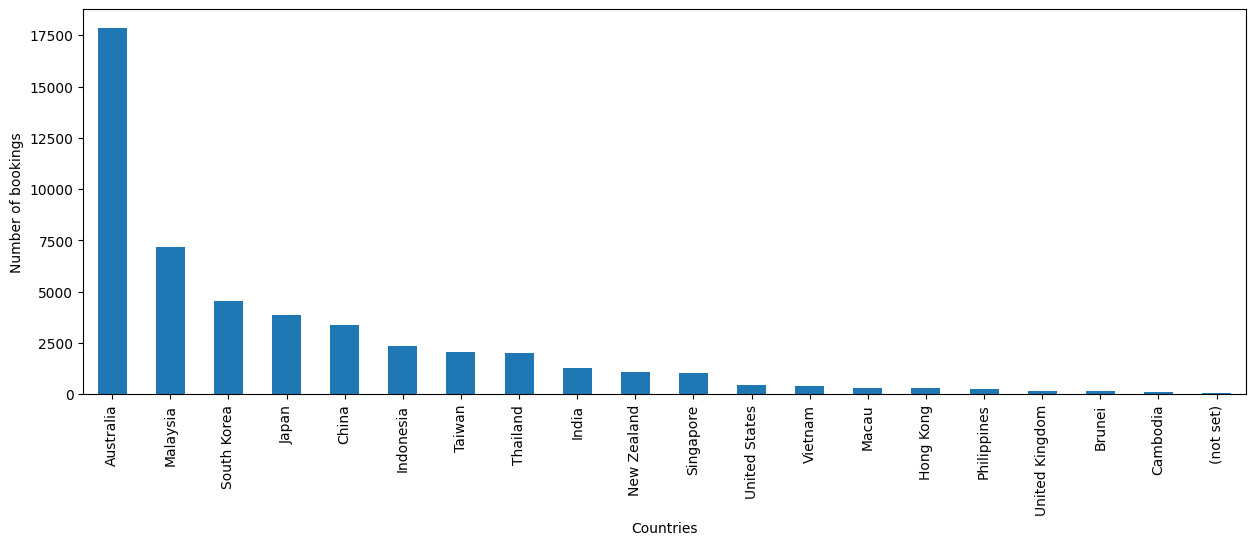

In [ ]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

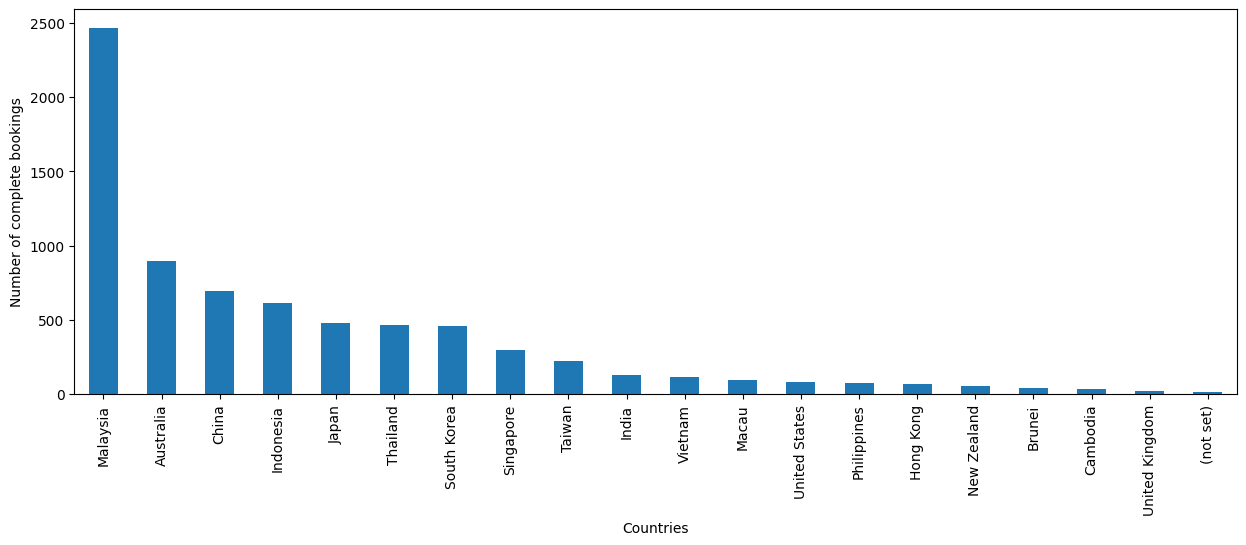

In [ ]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [ ]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100
unsuccessful_booking_per = 100-successful_booking_per
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


In [ ]:
ax = (df['booking_complete']==1).value_counts()
ax

False    42522
True      7478
Name: booking_complete, dtype: int64

In [ ]:
corr=df.corr()
corr

<ipython-input-139-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


<Axes: >

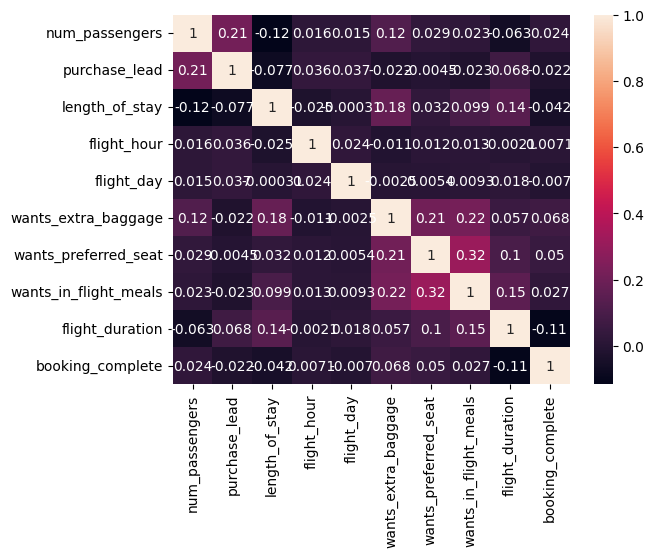

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sales_channel']= label_encoder.fit_transform(df['sales_channel'])
df['trip_type']= label_encoder.fit_transform(df['trip_type'])
df['flight_day']= label_encoder.fit_transform(df['flight_day'])
df['route']= label_encoder.fit_transform(df['route'])
df['booking_origin']= label_encoder.fit_transform(df['booking_origin'])



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_predictions = rfc.predict(x_test)

In [ ]:
from sklearn import metrics
ConMat = metrics.confusion_matrix(y_test,rfc_predictions)
TN,FP,FN,TP = ConMat.ravel()
Accuracy = metrics.accuracy_score(y_test,rfc_predictions)*100
Prec=TP/(TP+FN)
TPR=TP/(TP+FN)
FPR=FP/(TN+FP)
TNR=TN/(TN+FP)
FNR=FN/(FN+TP)
print("Confusion Matrix:\n",ConMat)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)
print('True Positive:', TP)
print('Accuracy: %.2f' %Accuracy)
print('Precision: %.2f' %Prec)
print('Recall/Sensitivity/True Positive Rate: %.2f' %TPR)
print('False Positive Rate: %.2f' %FPR)
print('Specificity/True Negative Rate: %.2f' %TNR)
print('False Negative Rate: %.2f' %FNR)

Confusion Matrix:
 [[8401  119]
 [1317  163]]
True Negative: 8401
False Positive: 119
False Negative: 1317
True Positive: 163
Accuracy: 85.64
Precision: 0.11
Recall/Sensitivity/True Positive Rate: 0.11
False Positive Rate: 0.01
Specificity/True Negative Rate: 0.99
False Negative Rate: 0.89


Rf= 85.61%
dt= 78.41%
log= 85.18%
ada= 85.26%
xgb= 85.32%
gb 85.45%

Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(x_train,y_train).coef_
print(lasso_coef)

[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -9.19294349e-05
 -2.50151353e-04  0.00000000e+00  0.00000000e+00 -5.61621616e-06
  1.31967248e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00]


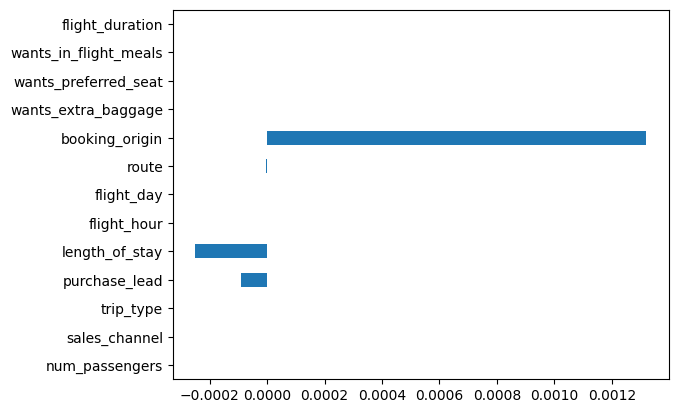

<Figure size 800x600 with 0 Axes>

In [ ]:
feat_imp = pd.Series(lasso_coef, index=x.columns)
feat_imp.plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

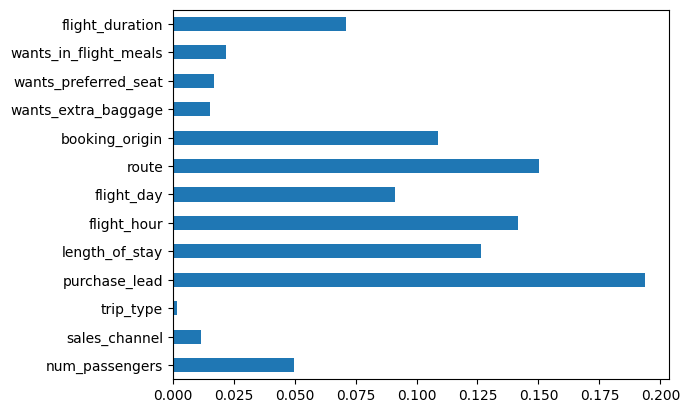

<Figure size 800x600 with 0 Axes>

In [ ]:
feat_imp = pd.Series(rfc.feature_importances_, index=x.columns)
feat_imp.plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

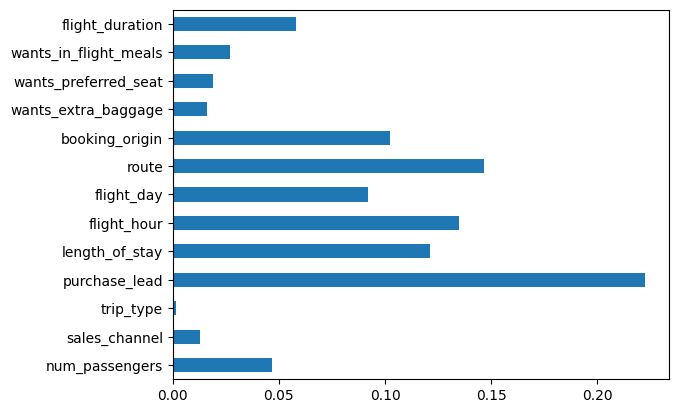

<Figure size 800x600 with 0 Axes>

In [ ]:
feat_imp = pd.Series(dt_model.feature_importances_, index=x.columns)
feat_imp.plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression)
selector.fit(x, y)

feature_scores = list(zip(x.columns, selector.scores_))


total_score = sum(selector.scores_)
for feature, score in feature_scores:
    percentage = (score / total_score) * 100
    print(f"{feature}: {percentage:.2f}%")


num_passengers: 1.38%
sales_channel: 4.00%
trip_type: 1.73%
purchase_lead: 1.16%
length_of_stay: 4.26%
flight_hour: 0.12%
flight_day: 0.28%
route: 0.17%
booking_origin: 41.20%
wants_extra_baggage: 11.04%
wants_preferred_seat: 5.96%
wants_in_flight_meals: 1.66%
flight_duration: 27.03%


After Feature selection

In [ ]:
from sklearn.model_selection import train_test_split

x = df[['booking_origin','wants_extra_baggage','flight_duration','wants_preferred_seat','length_of_stay','sales_channel']]
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
x

,booking_origin,wants_extra_baggage,flight_duration,wants_preferred_seat,length_of_stay,sales_channel
0,61,1,5.52,0,19,0
1,61,0,5.52,0,20,0
2,36,1,5.52,1,22,0
3,61,0,5.52,0,31,0
4,36,1,5.52,0,22,0
...,...,...,...,...,...,...
49995,4,1,5.62,0,6,0
49996,4,0,5.62,0,6,0
49997,4,0,5.62,0,6,0
49998,4,1,5.62,0,6,0


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_predictions = rfc.predict(x_test)
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_predictions = dt_model.predict(x_test)
log= LogisticRegression()
log.fit(x_train,y_train)
log_predictions = log.predict(x_test)
ada= AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_predictions = ada.predict(x_test)
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_predictions = xgb.predict(x_test)
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_predictions = gb.predict(x_test)

In [ ]:
from sklearn import metrics
ConMat = metrics.confusion_matrix(y_test,gb_predictions)
TN,FP,FN,TP = ConMat.ravel()
Accuracy = metrics.accuracy_score(y_test,gb_predictions)*100
Prec=TP/(TP+FN)
TPR=TP/(TP+FN)
FPR=FP/(TN+FP)
TNR=TN/(TN+FP)
FNR=FN/(FN+TP)
print("Confusion Matrix:\n",ConMat)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)
print('True Positive:', TP)
print('Accuracy: %.2f' %Accuracy)
print('Precision: %.2f' %Prec)
print('Recall/Sensitivity/True Positive Rate: %.2f' %TPR)
print('False Positive Rate: %.2f' %FPR)
print('Specificity/True Negative Rate: %.2f' %TNR)
print('False Negative Rate: %.2f' %FNR)

Confusion Matrix:
 [[8507   13]
 [1465   15]]
True Negative: 8507
False Positive: 13
False Negative: 1465
True Positive: 15
Accuracy: 85.22
Precision: 0.01
Recall/Sensitivity/True Positive Rate: 0.01
False Positive Rate: 0.00
Specificity/True Negative Rate: 1.00
False Negative Rate: 0.99
